<a href="https://colab.research.google.com/github/moonsung1234/LearningExample/blob/main/StochasticGradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**확률적 경사 하강법(Stochasitc Gradient Descent)** 에서

확률적 경사 하강법
  > **샘플을 1개씩 꺼내 학습시킴**<br/>

미니배치 경사 하강법  
  > **샘플을 여러개 꺼내 학습시킴**<br/>

배치 경사 하강법 
  >  **샘플을 몽땅 꺼내 학습시킴**<br/>



In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

---
**로지스틱 손실 함수**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


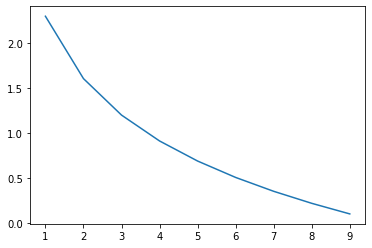

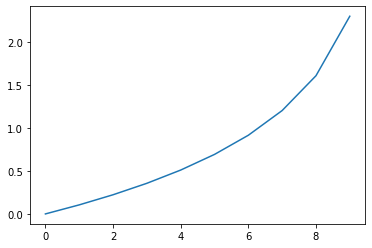

In [3]:
data = np.arange(0, 1, 0.1)

# target 이 1일때

plt.plot(-np.log(data))
plt.show()

# target 이 0일때

plt.plot(-np.log(1 - data))
plt.show()

In [6]:
fish = pd.read_csv("https://bit.ly/fish_csv")

fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]]
fish_target = fish["Species"]

In [9]:
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [16]:
fish_target.head()

0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object

In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, test_size=0.2, random_state=2021)

In [12]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [28]:
model = SGDClassifier(loss="log", max_iter=10, random_state=2021)
model.fit(train_scaled, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=2021, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
print(model.score(train_scaled, train_target))
print(model.score(test_scaled, test_target))

0.8346456692913385
0.75


적절한 epoch(에포크) 찾기

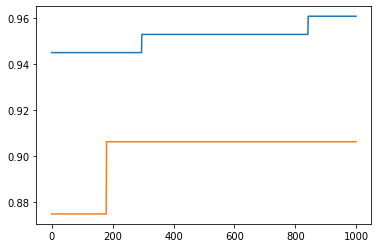

In [31]:
train_score = []
test_score = []
_classes = np.unique(train_target)

for _ in range(0, 1000) :
  model.partial_fit(train_scaled, train_target, classes=_classes)

  train_score.append(model.score(train_scaled, train_target))
  test_score.append(model.score(test_scaled, test_target))

plt.plot(train_score)
plt.plot(test_score)
plt.show()